# Importing Required Modules

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating dataframes for the Model

In [54]:
df=pd.read_csv('train.csv')
print(df)

      Unnamed: 0         0         1         2         3         4         5  \
0              0  0.081854  0.162635  0.277852  0.343025  0.378866  0.413383   
1              1  0.102432  0.153893  0.206869  0.336203  0.382572  0.402428   
2              2  0.015708  0.103597  0.198936  0.276845  0.310507  0.321577   
3              3  0.179396  0.239438  0.307044  0.365174  0.401451  0.433398   
4              4  0.304027  0.241181  0.168301  0.142746  0.152611  0.162520   
...          ...       ...       ...       ...       ...       ...       ...   
5211        3870  0.001449  0.049044  0.169362  0.245682  0.284311  0.384226   
5212        3871  0.361376  0.360008  0.406875  0.422987  0.375033  0.349482   
5213        3872  0.097749  0.051935  0.078719  0.249755  0.219368  0.241758   
5214        3873  0.173169  0.187989  0.224778  0.247073  0.168668  0.162465   
5215        3874  0.037483  0.050916  0.119764  0.217049  0.170403  0.172652   

             6         7         8  ...

In [55]:
xtrain = df[df.columns[range(1,2501)]]
ytrain = df[df.columns[-1]]

In [56]:
df1=pd.read_csv('validation.csv')
print(df1)
xval = df1[df.columns[range(1,2501)]]
yval = df1[df.columns[-1]]

    Unnamed: 0         0         1         2         3         4         5  \
0            0  0.090265  0.151757  0.287090  0.405232  0.457681  0.466542   
1            1  0.317278  0.150989  0.052835  0.035858  0.019328  0.005076   
2            2  0.262639  0.387552  0.467830  0.514264  0.628833  0.689737   
3            3  0.269848  0.211767  0.115692  0.084487  0.066895  0.054488   
4            4  0.124831  0.091084  0.166966  0.219295  0.248790  0.258376   
5            5  0.220775  0.288004  0.434977  0.440711  0.457434  0.465287   
6            6  0.095524  0.148794  0.171945  0.168092  0.108576  0.046366   
7            7  0.022047  0.055073  0.094745  0.129225  0.159926  0.178625   
8            0  0.082085  0.124119  0.237056  0.312504  0.207963  0.242521   
9            1  0.006667  0.013462  0.179550  0.138058  0.112079  0.262939   
10           2  0.358911  0.393313  0.335998  0.426395  0.503835  0.544665   
11           3  0.019712  0.094630  0.204028  0.347768  0.397955

# Building the Model

## Logistic Regression

### Packages

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

### Parameter testing

In [58]:
clf = LogisticRegression(random_state=0).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
clf = LogisticRegression(max_iter=10000,C=0.1 ).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


Acceptable Model

In [60]:
clf = LogisticRegression(penalty='none',max_iter=10000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


Low Validation score and overfitting of Train score

In [61]:
clf = LogisticRegression(solver='newton-cg',penalty='none').fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


Low Validation score and overfitting of Train score

In [62]:
clf = LogisticRegression(solver='newton-cg',penalty='l2').fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


Low Validation score

In [63]:
clf = LogisticRegression(solver='newton-cg',penalty='l2',C=0.01).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


Acceptable Model

In [64]:
clf = LogisticRegression(solver='newton-cg',penalty='l2',C=0.1).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


Acceptable Model

In [65]:
clf = LogisticRegression(solver='liblinear',penalty='l2').fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


Low Validation score

In [66]:
clf = LogisticRegression(solver='liblinear',penalty='l2', C=0.1).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


Acceptable Model

In [67]:
clf = LogisticRegression(solver='liblinear',penalty='l1').fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


Acceptable Model

In [68]:
clf = LogisticRegression(solver='liblinear',penalty='l1', C=0.2).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


Acceptable Model

In [69]:
clf = LogisticRegression(solver='sag',penalty='l2').fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Low Validation score

In [70]:
clf = LogisticRegression(solver='sag',penalty='none').fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Acceptable Model

In [71]:
clf = LogisticRegression(solver='sag',penalty='l2', C=0.1).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Acceptable Model

## KNN

### Packages

In [72]:
from sklearn.neighbors import KNeighborsClassifier

### Testing Error Rate

In [73]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xval)
    error_rate.append(np.mean(pred_i != yval))

Text(0, 0.5, 'Error Rate')

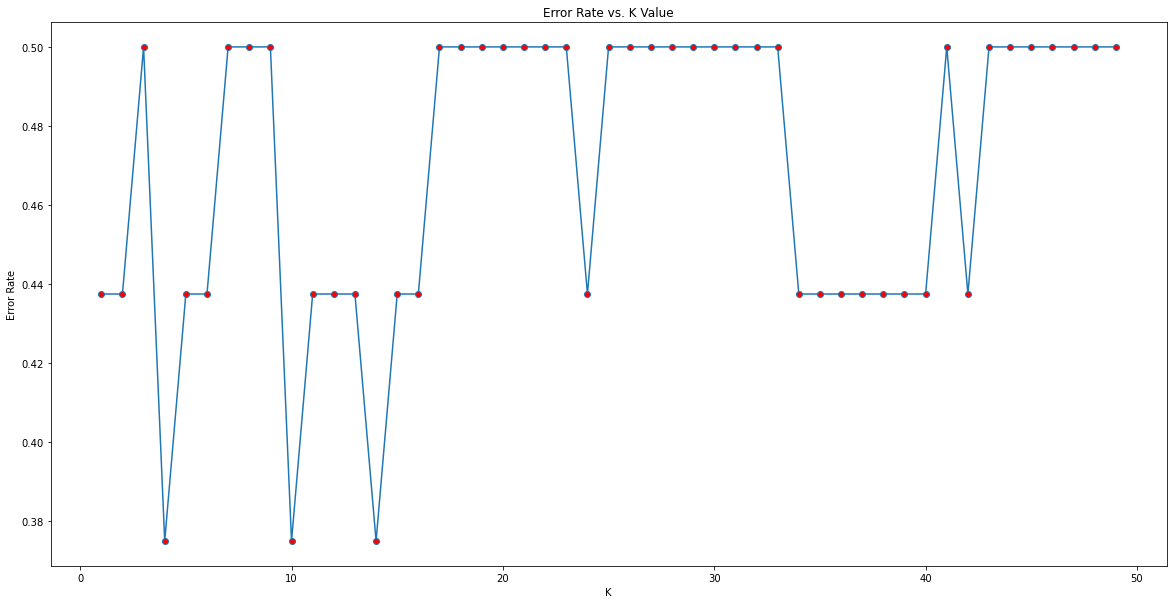

In [74]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),error_rate,marker='o',markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Min error at 3, 5, 9, and 13

### Testing Accuracy

In [75]:
acc = []
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(xtrain,ytrain)
    yhat = neigh.predict(xval)
    acc.append(metrics.accuracy_score(yval, yhat))

Text(0, 0.5, 'Accuracy')

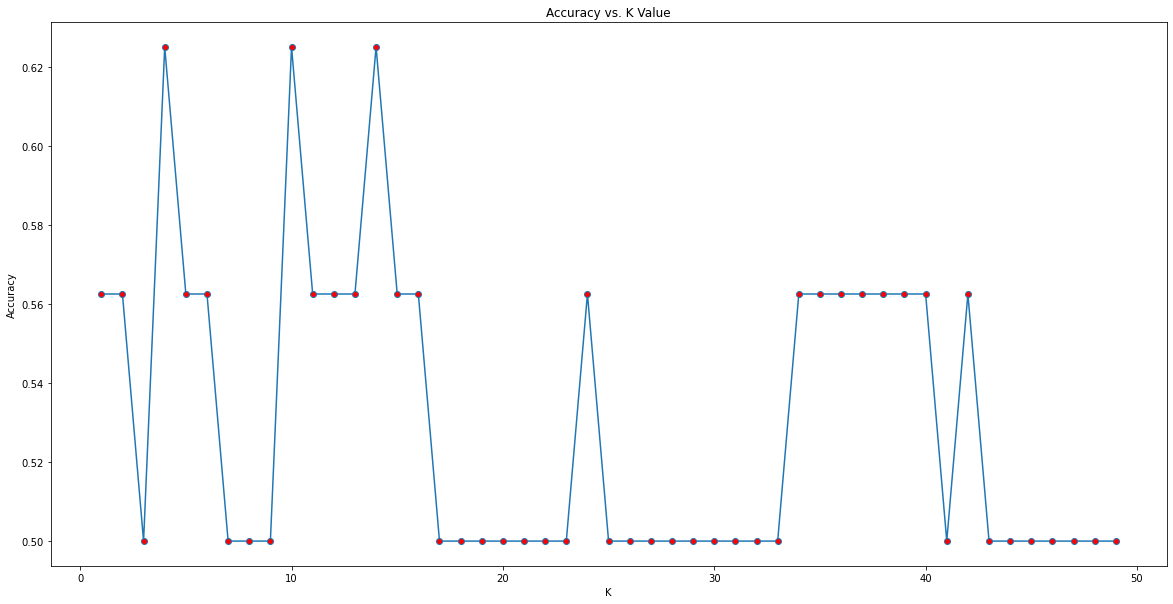

In [76]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),acc,marker='o',markerfacecolor='red')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Max accuracy of 0.625 using knn, thereefore we will not select this model

# SVM

## Packages

In [77]:
from sklearn import svm

In [78]:
clf = svm.SVC()
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


Low Validation score

In [79]:
clf = svm.SVC(gamma='auto')
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


Acceptable Model

In [80]:
clf = svm.SVC(gamma='auto', C=0.1)
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.5


Low Validation score

In [81]:
clf = svm.SVC(gamma='auto', C=2)
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


Acceptable Model

In [82]:
clf = svm.SVC(gamma='auto', C=10)
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


Acceptable Model

In [83]:
clf = svm.SVC(gamma='auto',kernel='sigmoid', C=2)
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


In [84]:
clf = svm.SVC(gamma='auto',kernel='linear')
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


In [85]:
clf = svm.SVC(gamma='auto',kernel='poly')
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.5


In [86]:
clf = svm.SVC(gamma='auto',kernel='poly', degree=2)
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.625


In [87]:
clf = svm.SVC(gamma='auto',kernel='poly', degree=1)
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


In [88]:
clf = svm.SVC(gamma='auto',kernel='poly', degree=4)
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.5


In [89]:
clf = svm.SVC(gamma='auto',kernel='poly', degree=1, C=2)
clf.fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


### Max Accuracy is 0.81 which is not the highest, therefore we do not select this model

# MLP

## Packages

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
clf=MLPClassifier().fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


In [92]:
clf=MLPClassifier(solver='lbfgs', max_iter=500).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


In [93]:
clf=MLPClassifier(solver='sgd', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


In [94]:
clf=MLPClassifier(activation='tanh',solver='lbfgs', max_iter=500).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


In [95]:
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25,),activation='tanh',solver='sgd', max_iter=500).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.6875


In [96]:
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,),activation='tanh',solver='sgd', max_iter=500).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


In [97]:
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,),activation='tanh',solver='lbfgs', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


In [98]:
clf=MLPClassifier(activation='logistic',solver='sgd', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


In [99]:
clf=MLPClassifier(activation='logistic',solver='lbfgs', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75


In [100]:
clf=MLPClassifier(activation='logistic',solver='adam', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.8125


In [101]:
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,),activation='logistic',solver='sgd', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.5


In [102]:
clf=MLPClassifier(activation='identity',solver='adam', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.6875


In [103]:
clf=MLPClassifier(activation='identity',solver='sgd', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.875


In [104]:
clf=MLPClassifier(activation='identity',solver='lbfgs', max_iter=1000).fit(xtrain, ytrain)
print(clf.score(xval,yval))

0.75
